# 05. forecast (시계열 분석)

## 1. 배경 및 설치

- install
    - 윈도우 유저는 visual C++ build tool을 먼저 설치해주세요
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet

In [3]:
from pandas_datareader import data
from fbprophet import Prophet

----------------------------------

## 함수(def)의 기초

In [4]:
def test_def(a,b):
    return a+b    # 변수에 담아주기 위함 c = test_def(2,3)

In [5]:
test_def(2,3)

5

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 입력 인자(a, b)를 정해준다
- 출력(return)을 작성

In [6]:
# 전역변수(global)
a = 1

def edit_a(i):
    # 지역변수(local)
    # 지역변수가 있는 위치에서 전역변수를 사용하고 싶으면 global
    a = i
    

In [8]:
edit_a(2)

In [10]:
a

1

In [11]:
def edit_a(i):
    global a  # 함수 내부적으로 a가 없으면 함수 밖에 있는 a 가져와서 사용
    a = i
    

In [12]:
edit_a(2)

In [13]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global 로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
def plotSinwave(**kwargs):
    '''
    plot sine wave                           # docstring 기능
    y = asin(2\pi ft + t_0) + b
    '''
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    # 값 써주면 그 값대로, 안써주면 디폴트값 
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp + np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + '*sin(2*pi' + str(freq) + '*t+' + str(startTime) + ')+' + str(bias))
    plt.show()

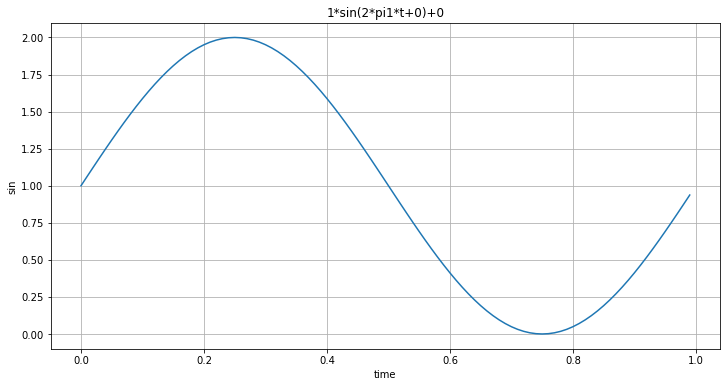

In [25]:
plotSinwave()

In [1]:
# 현재 경로에 모듈 만들어 놨으니 임포트 가능

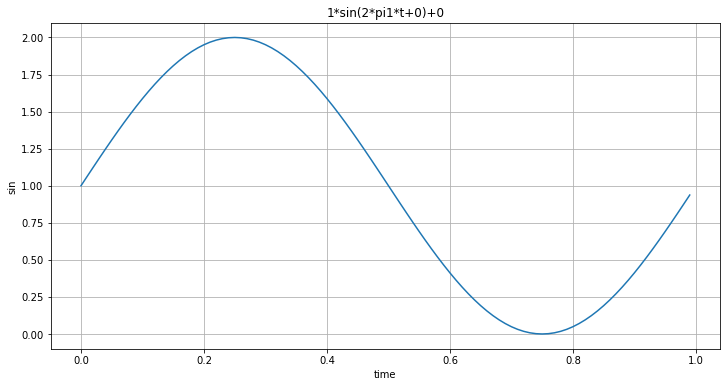

In [2]:
import plotSinWave as pS

pS.plotSinwave()

-----------------------

## 2. Fbprophet 기초

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head(5)


,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


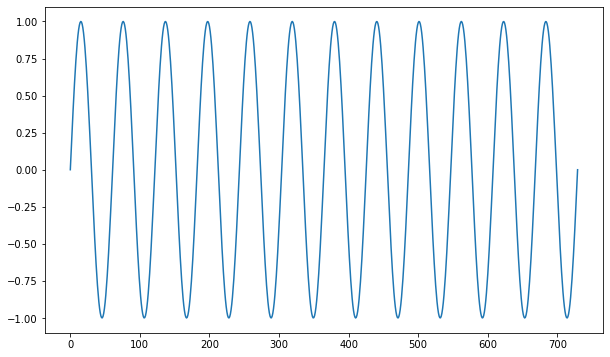

In [5]:
# y축 값을 df 의 y컬럼 값으로 함수 그리기
df['y'].plot(figsize=(10,6));

In [9]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

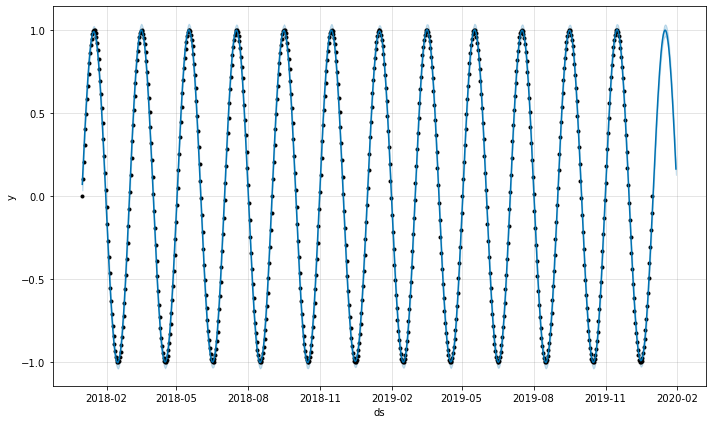

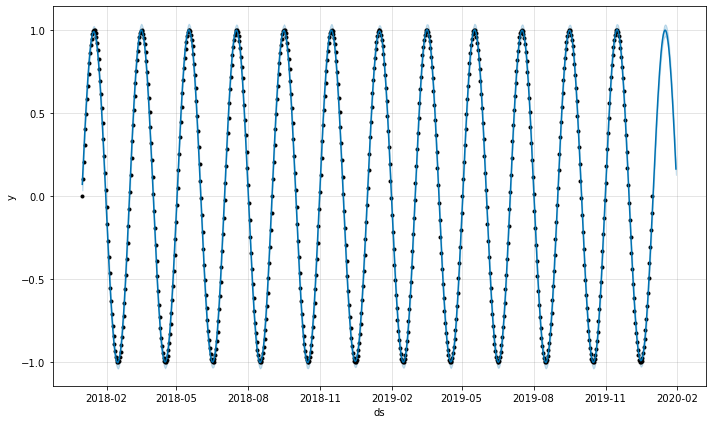

In [10]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)  # 예측한 값 시각화

## 2

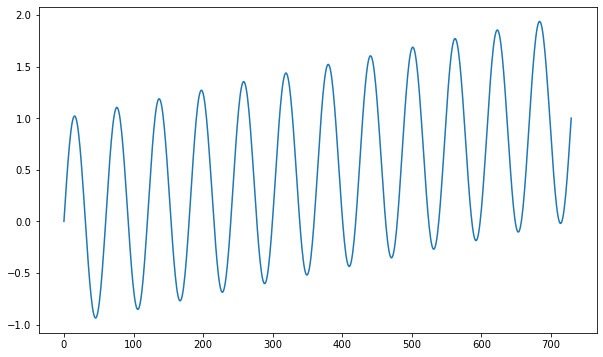

In [12]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

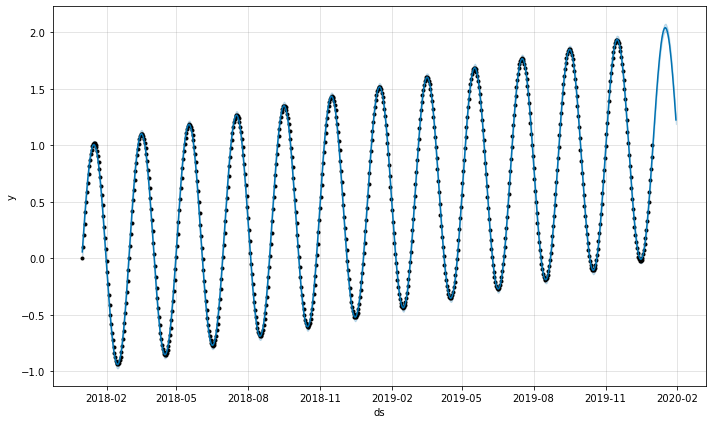

In [14]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3

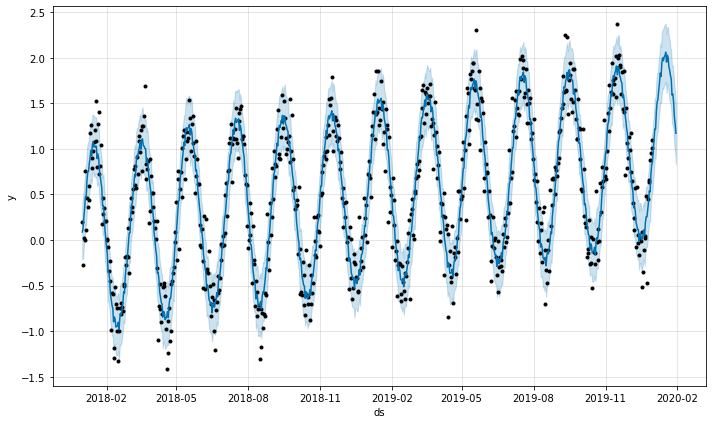

In [15]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3. 시계열 데이터 실전 이용해보기
-http://pinkwink.kr/

In [17]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet 
from datetime import datetime  


In [21]:
pinkwink_web = pd.read_csv(
    '../data/05_PinkWink_Web_Traffic.csv',
    encoding='utf-8',
    thousands=',',
    names=['date','hit'], 
    index_col=0  # date가 인덱스로 들어감
)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


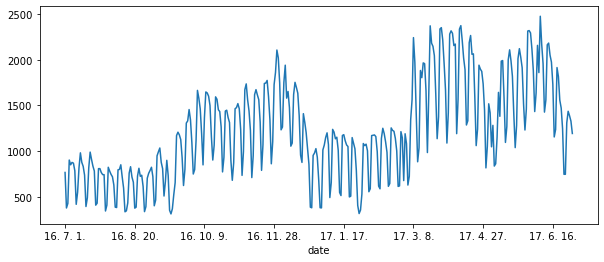

In [22]:
# 전체 데이터 그려보기
pinkwink_web['hit'].plot(figsize=(10,4), grid=());

In [27]:
# 트렌드 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values  # value값만 가져오기
fx = np.linspace(0, time[-1], 1000)  # time[-1] == 364 


In [28]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [31]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f1

poly1d([  2.94751137, 678.39950595])

In [32]:
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [33]:
# 경향에서의 traffic값 - traffic값
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777308271017


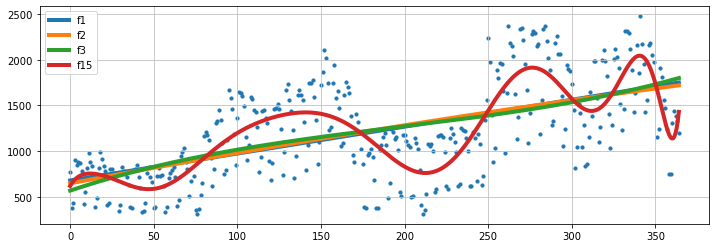

In [36]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)  # 날짜별 트래픽 그래프
plt.plot(fx, f1(fx), lw=4, label='f1')  # 경향 그래프 
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [42]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)  # 인덱스 값을 0~ 설정
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [43]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)  #학습을 시키고

In [44]:
# 60일에 해당하는 데이터 예측

future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [46]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,895.442708,695.789172,1100.214382
421,2017-08-26,480.355983,282.654791,699.231060
422,2017-08-27,613.043801,413.044571,834.752081
423,2017-08-28,1165.847510,966.040167,1366.917827
424,2017-08-29,1201.895758,997.123727,1415.367249


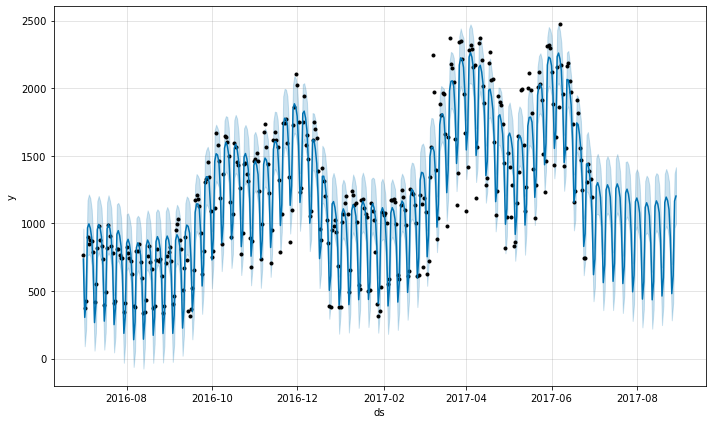

In [47]:
m.plot(forecast);

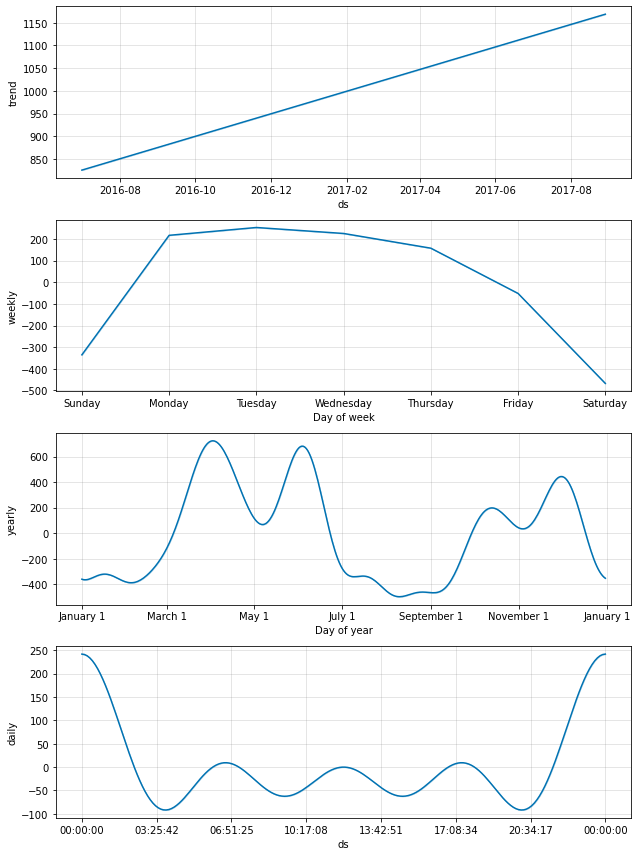

In [48]:
m.plot_components(forecast);

## 4. 주식 데이터 fbprophet 으로 분석하기

1. yahoo finance
https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [53]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = 'https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1'
req = Request(url, headers={'User-Agent':'Chrome'})
page = urlopen(req).read() #html 코드 읽어줌
soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table')
df_raw = pd.read_html(str(table))[0]  #밑의 모양으로 가져오려면 옵션을 이렇게 줘야하는구나 정도 확인
df_raw

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 12, 2021",384500.00,387000.00,372000.00,372000.00,372000.00,804145
1,"Oct 08, 2021",397500.00,397500.00,388000.00,388500.00,388500.00,542514
2,"Oct 07, 2021",380500.00,394000.00,378000.00,393500.00,393500.00,832068
3,"Oct 06, 2021",373000.00,383500.00,371500.00,373000.00,373000.00,826716
4,"Oct 05, 2021",378500.00,380000.00,370000.00,370500.00,370500.00,828794
...,...,...,...,...,...,...,...
96,"May 21, 2021",355000.00,360000.00,353500.00,360000.00,360000.00,618431
97,"May 20, 2021",351500.00,355000.00,348500.00,351000.00,351000.00,561151
98,"May 18, 2021",347000.00,349500.00,345000.00,349500.00,349500.00,445015
99,"May 17, 2021",345500.00,349000.00,341000.00,344000.00,344000.00,453316


In [55]:
# fbprophet을 사용하는 형식에 맞춰준 뒤,
df_tmp = pd.DataFrame({'ds':df_raw['Date'], 'y':df_raw['Close*']})
df_target = df_tmp[:-1]  # 맨 마지막 NaN값이 있어서 없애줌
df_target

,ds,y
0,"Oct 12, 2021",372000.00
1,"Oct 08, 2021",388500.00
2,"Oct 07, 2021",393500.00
3,"Oct 06, 2021",373000.00
4,"Oct 05, 2021",370500.00
...,...,...
95,"May 24, 2021",355500.00
96,"May 21, 2021",360000.00
97,"May 20, 2021",351000.00
98,"May 18, 2021",349500.00


In [58]:
# hardcopy 후, 날짜를 fbprophet이 요구하는 형태로 변형

df = df_target.copy()
df['ds'] = pd.to_datetime(df_target['ds'], format='%b %d, %Y')
df.head()


,ds,y
0,2021-10-12,372000.00
1,2021-10-08,388500.00
2,2021-10-07,393500.00
3,2021-10-06,373000.00
4,2021-10-05,370500.00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [60]:
# 데이터형 변환 object => float
df['y']=df['y'].astype('float')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [62]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [63]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-07,406698.532687,394707.363036,417971.027957
126,2021-11-08,413145.684961,401844.056914,424197.725815
127,2021-11-09,414507.754983,403939.189511,425647.233334
128,2021-11-10,415702.182801,404723.145571,427306.295478
129,2021-11-11,418224.264924,406742.853633,430004.040581


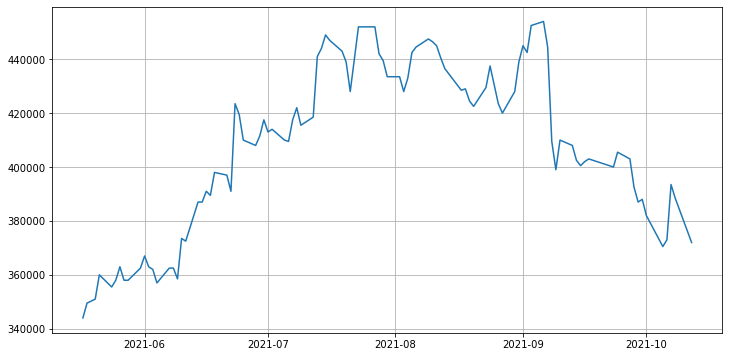

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.grid()
plt.show()

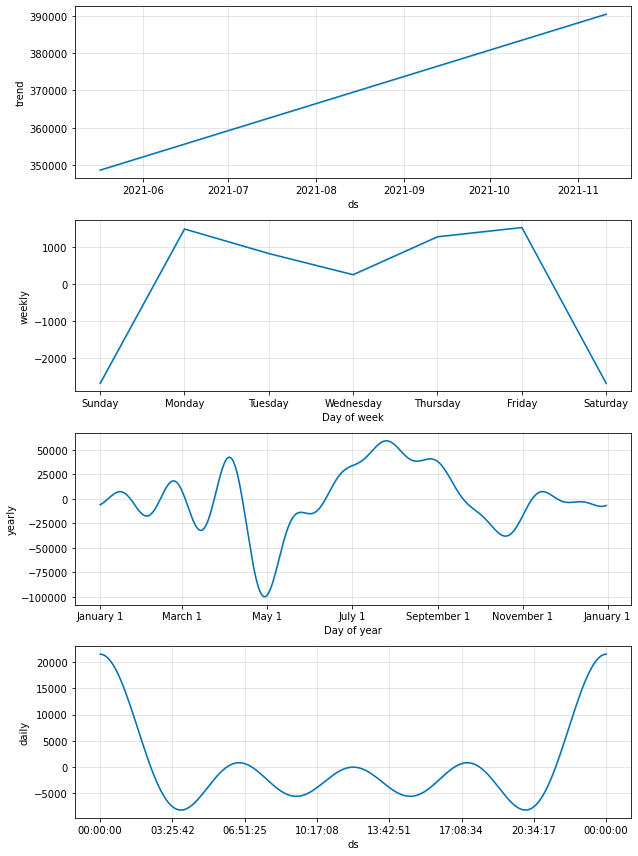

In [67]:
m.plot_components(forecast);

### 2. KIA
- pip install yfinance

In [68]:
# 기아자동차의 종목코드를 야후에서 가지고 오고, 기간 입력한다
import yfinance as yf 
from pandas_datareader import data 

yf.pdr_override()

start_date = '2010-03-01'
end_date = '2018-02-28'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [69]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.660156,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.734375,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.201172,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.869141,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.603516,4326618


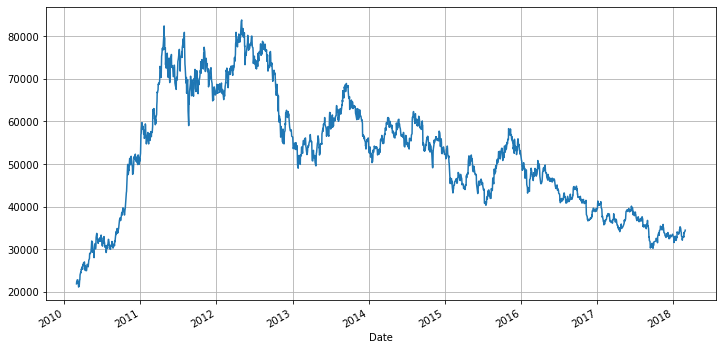

In [70]:
KIA['Close'].plot(figsize=(12,6),grid=True);

In [72]:
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:'2017-11-30']
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,33150.0,33400.0,32800.0,33050.0,30097.226562,773316
2017-11-27,32800.0,33050.0,32450.0,32750.0,29824.029297,1318245
2017-11-28,32650.0,33450.0,32450.0,32950.0,30006.160156,1350643
2017-11-29,33000.0,33500.0,32700.0,33350.0,30370.421875,884282
2017-11-30,33700.0,34250.0,33500.0,33650.0,30643.621094,2048876


In [73]:
# forecast를 위한 준비
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [74]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [75]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,26830.720886,22851.974488,31059.508714
2002,2018-02-25,26912.385175,22721.174197,30979.287784
2003,2018-02-26,27147.993155,23050.910175,31305.488991
2004,2018-02-27,27310.992294,23079.685593,31397.782855
2005,2018-02-28,27357.644192,23254.339375,32029.168803


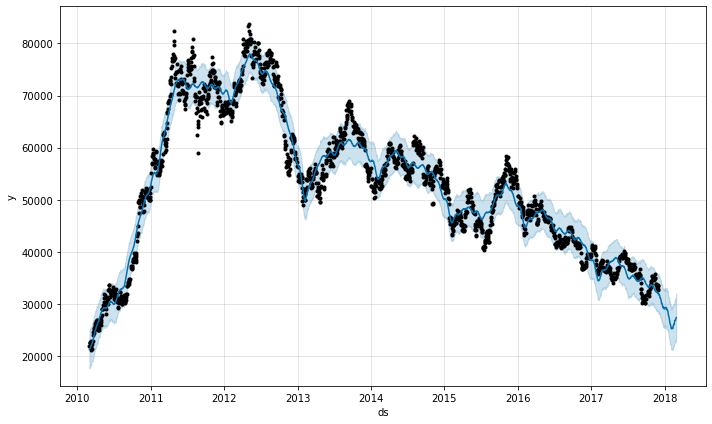

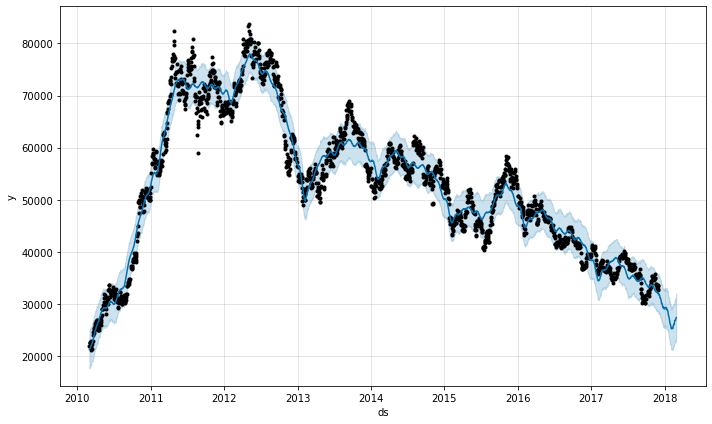

In [76]:
m.plot(forecast)

In [77]:
KIA['Close']

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

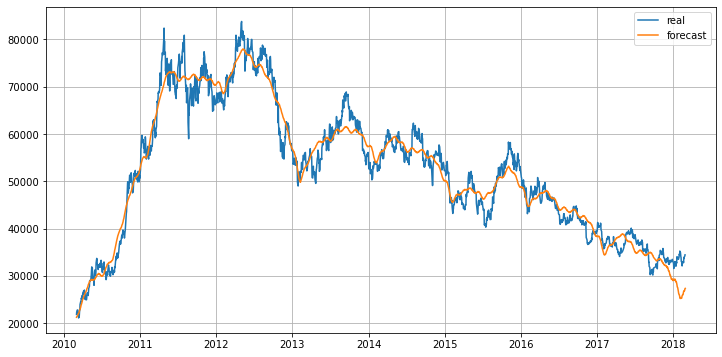

In [78]:
# 실제와 예측한 값이 얼마나 차이가 있는지 비교
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 3. 대한항공

In [79]:
# 003490 대한한공

start_date = '2010-03-01'
end_date = '2018-02-28'
KoreanAir = data.get_data_yahoo('003490.KS', start_date, end_date)
KoreanAir.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-21,35350.0,35950.0,35150.0,35350.0,35167.996094,237279
2018-02-22,35050.0,35450.0,34800.0,35000.0,34819.800781,260174
2018-02-23,35200.0,35400.0,34550.0,35150.0,34969.027344,321125
2018-02-26,35300.0,35550.0,33600.0,33900.0,33725.460938,932870
2018-02-27,33900.0,34300.0,33650.0,33900.0,33725.460938,527398


<AxesSubplot:xlabel='Date'>

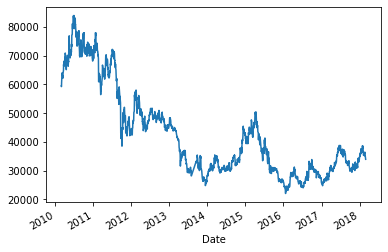

In [80]:
KoreanAir['Close'].plot()

In [82]:
# 데이터 분리

KoreanAir_trunc = KoreanAir[:'2017-11-30']
KoreanAir_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,32900.0,33250.0,32300.0,32500.0,32168.935547,530941
2017-11-27,32600.0,32800.0,31800.0,31850.0,31525.556641,472095
2017-11-28,32050.0,32500.0,31550.0,31600.0,31278.103516,708754
2017-11-29,31850.0,32250.0,31050.0,31300.0,30981.160156,850385
2017-11-30,31800.0,32050.0,31350.0,31350.0,31030.650391,682573


In [83]:
# forecast 알고리즘이 원하는 데이터 형태로 가공
df = pd.DataFrame({'ds':KoreanAir_trunc.index, 'y':KoreanAir_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [84]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [85]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1970,2018-02-24,34756.574017,30352.962643,38988.292943
1971,2018-02-25,34657.032289,30415.987157,38793.539964
1972,2018-02-26,35590.837510,31103.495248,39861.103867
1973,2018-02-27,35429.734058,30947.254631,39790.764415
1974,2018-02-28,35362.970424,31053.424876,39737.395937


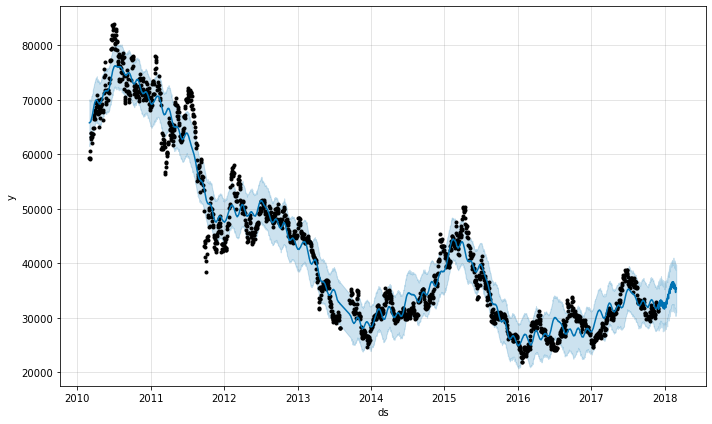

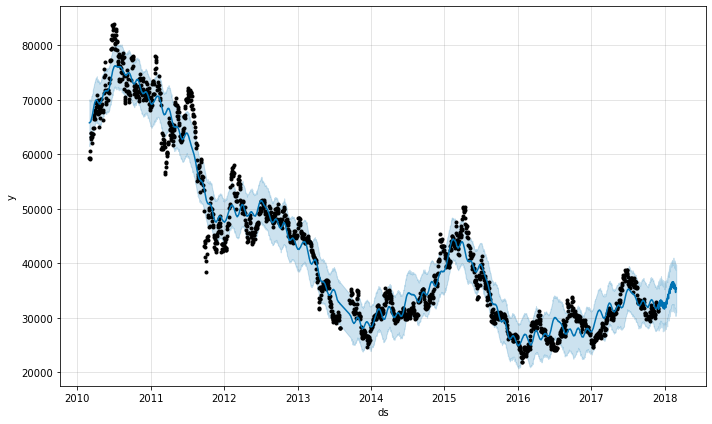

In [86]:
m.plot(forecast)

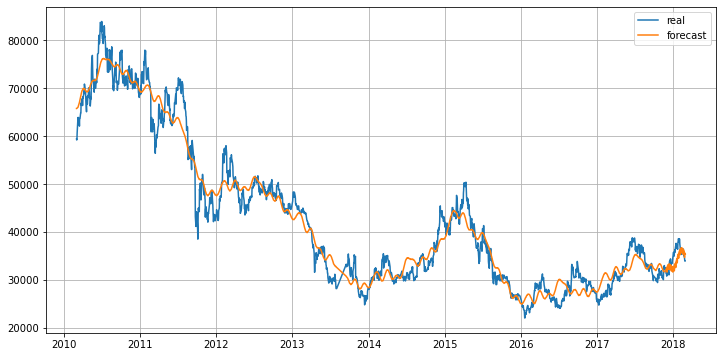

In [87]:
# 실제와 예측한 값이 얼마나 차이가 있는지 비교(파란색이 실제값)
plt.figure(figsize=(12,6))
plt.plot(KoreanAir.index, KoreanAir['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 4. 조금 특이한 형태의 데이터에 대한 forecast

<AxesSubplot:>

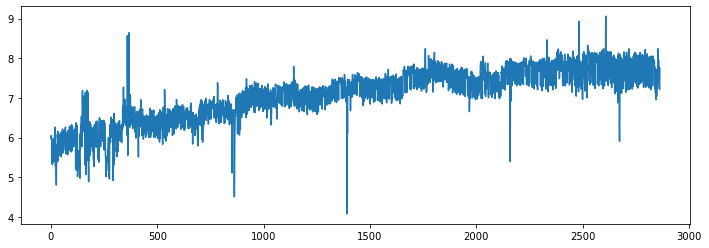

In [88]:
# logistic 성장형 그래프를 가진 데이터에 대한 forecast

df = pd.read_csv('../data/05_example_wp_R2.csv', index_col=0)
df['y'].plot(figsize=(12,4))

In [89]:
df['cap']=8.5
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


In [90]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df);

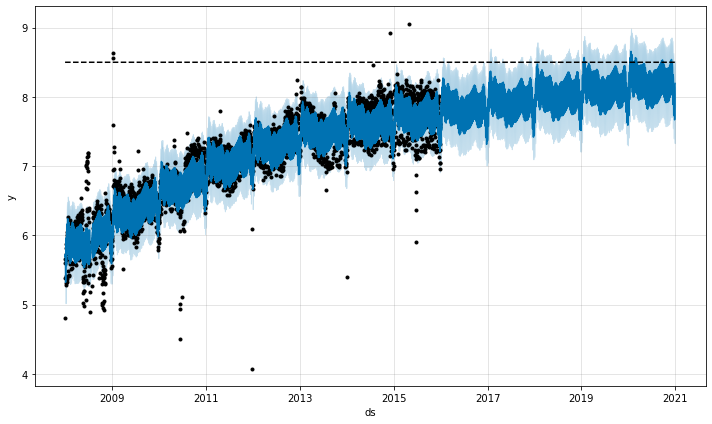

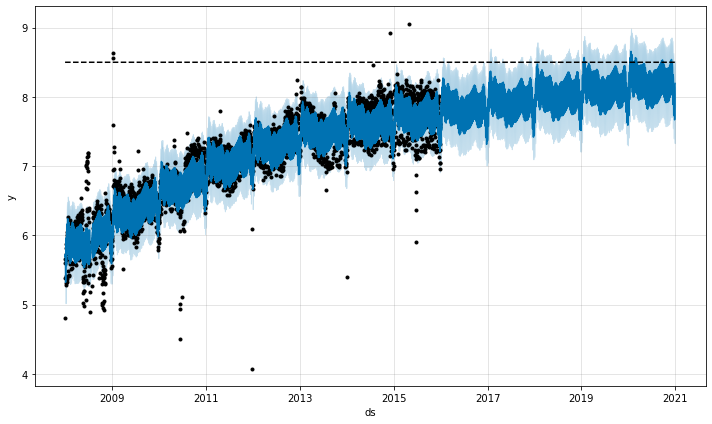

In [92]:
future = m.make_future_dataframe(periods=1826)
future['cap']=8.5
forecast = m.predict(future)
m.plot(forecast)

## 5. 비트코인 데이터 fbprophet으로 분석하기
- https://bitcoincharts.com/charts/
bitstampUSD#rg730ztgSzm1g10zm2g25zv

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

In [113]:
# selenium으로 url 접근

url = 'https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

In [114]:
# 스크롤 
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script('return arguments[0].scrollIntoView();', variable) #variable 태그까지 내림
variable.click()


In [115]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', 'data')


In [116]:
driver.quit()

In [117]:
df = pd.read_html(str(table))
bitcoin = df[0]  # 리스트 형태이기 때문에, [0] 꼭 잊지 말고!
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
725,2021-10-08 00:00:00,53816.16,56168.00,53623.02,53957.21,2217.76,1.213333e+08,54709.97
726,2021-10-09 00:00:00,53952.82,55512.05,53674.69,54976.92,1061.02,5.821879e+07,54870.42
727,2021-10-10 00:00:00,54984.49,56561.00,51000.00,54714.95,1735.42,9.565476e+07,55119.02
728,2021-10-11 00:00:00,54657.00,57855.79,54462.45,57485.20,1955.79,1.110931e+08,56802.29
729,2021-10-12 00:00:00,57490.00,57701.00,56444.69,57320.00,621.17,3.548643e+07,57128.75


In [119]:
!rm -rf '../data/05_bitcoin_history.csv'
bitcoin.to_csv('../data/05_bitcoin_history.csv', sep=',')

'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [120]:
bitcoin = pd.read_csv('../data/05_bitcoin_history.csv', index_col=0)
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
725,2021-10-08 00:00:00,53816.16,56168.00,53623.02,53957.21,2217.76,1.213333e+08,54709.97
726,2021-10-09 00:00:00,53952.82,55512.05,53674.69,54976.92,1061.02,5.821879e+07,54870.42
727,2021-10-10 00:00:00,54984.49,56561.00,51000.00,54714.95,1735.42,9.565476e+07,55119.02
728,2021-10-11 00:00:00,54657.00,57855.79,54462.45,57485.20,1955.79,1.110931e+08,56802.29
729,2021-10-12 00:00:00,57490.00,57701.00,56444.69,57320.00,621.17,3.548643e+07,57128.75


In [121]:
# 분석하고 싶은 항목(Close)만 가지고, Prophet 적용

df = pd.DataFrame({'ds':bitcoin['Timestamp'], 'y':bitcoin['Close']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);


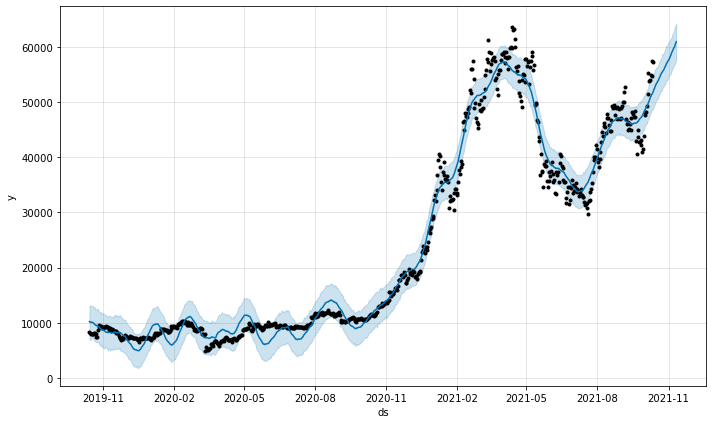

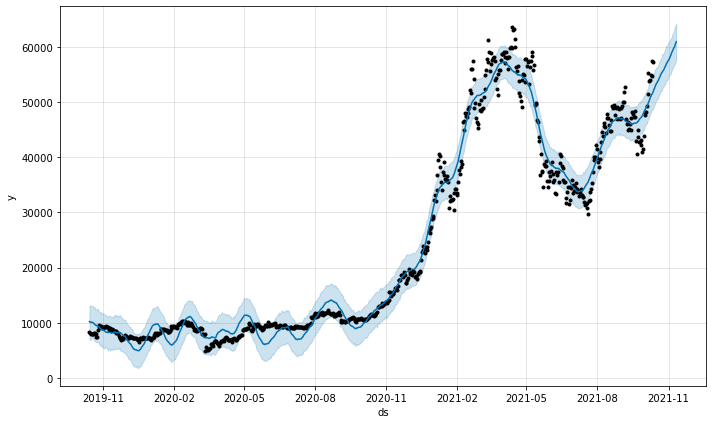

In [122]:
# 향후 30일간의 forecast
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

In [ ]:
# 트렌드 확인
m.plot_components(forecast);